In [1]:
pip install -U scikit-learn scipy matplotlib


     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 2.6 MB/s eta 0:00:04
      --------------------------------------- 0.2/9.2 MB 1.8 MB/s eta 0:00:05
     - -------------------------------------- 0.3/9.2 MB 2.5 MB/s eta 0:00:04
     - -------------------------------------- 0.4/9.2 MB 2.3 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/9.2 MB 2.3 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/9.2 MB 2.2 MB/s eta 0:00:04
     -- ------------------------------------- 0.7/9.2 MB 2.1 MB/s eta 0:00:05
     --- ------------------------------------ 0.7/9.2 MB 2.0 MB/s eta 0:00:05
     --- ------------------------------------ 0.8/9.2 MB 1.9 MB/s eta 0:00:05
     --- ------------------------------------ 0.8/9.2 MB 1.8 MB/s eta 0:00:05
     --- ------------------------------------ 0.9/9.2 MB 1.8 MB/s eta 0:00:05
     ---- ----------------------------------- 1.0/9.2 MB 1.8 MB/s eta 


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import sklearn

In [22]:
import cv2

In [23]:
import matplotlib.pyplot as plt

In [39]:
im = cv2.imread('elephant.jpg') # Reads an image in BGR format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)


(1350, 2400, 3)


1350 X 2400 pixel, 3 - depth

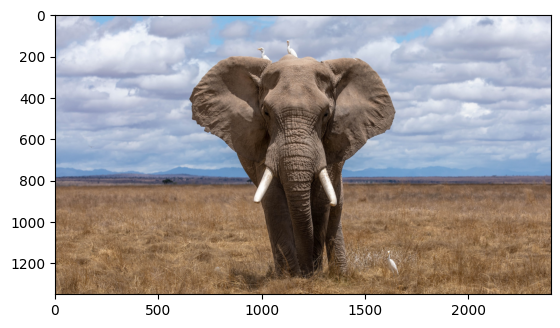

In [40]:
plt.imshow(im) #as RGB format
plt.show()

In [41]:
#Flatten each channel of the image

all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(3240000, 3)


In [42]:
from sklearn.cluster import KMeans

In [43]:
dominant_colors = 4
km = KMeans(n_clusters= dominant_colors)
km.fit(all_pixels)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [44]:
centers = km.cluster_centers_ #$ most dominant color's RGB value

In [45]:
import numpy as np

In [46]:
centers = np.array(centers,dtype='uint8')
print(centers)

[[ 70  51  37]
 [207 213 226]
 [145 116  90]
 [165 180 205]]


Plot what all colors are these ?

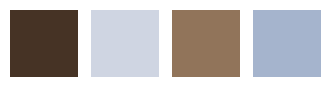

In [47]:
i = 1

plt.figure(0,figsize = (4,2))

colors = []
for each_col in centers:
    plt.subplot(1,4,i) # subplot of 1X4, 1-row , 4-column, ith part
    plt.axis("off") #turning off the grid in the plot
    i +=1

    colors.append(each_col)

    #Color Swatch
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()



Segmenting our original image

In [48]:
new_img = np.zeros((1350*2400, 3), dtype='uint8')

print(new_img.shape)

(3240000, 3)


In [49]:
colors

[array([70, 51, 37], dtype=uint8),
 array([207, 213, 226], dtype=uint8),
 array([145, 116,  90], dtype=uint8),
 array([165, 180, 205], dtype=uint8)]

In [50]:
km.labels_ # a matrix - for each pixel it is giving a id

array([1, 1, 1, ..., 2, 2, 2])

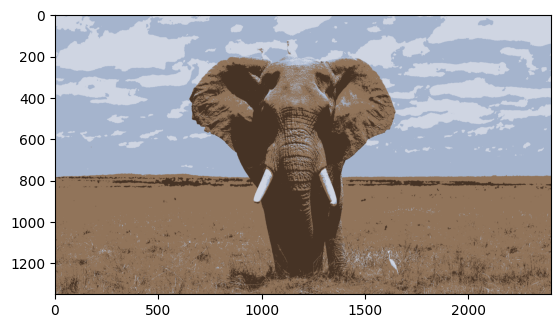

In [51]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()